In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

In [18]:
phi_r1 = 2 * np.pi * np.random.rand(1000)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(1000)
X1 = R_r1 * np.cos(phi_r1)
Y1 = R_r1 * np.sin(phi_r1)

In [19]:
phi_r2 = 2 * np.pi * np.random.rand(1000)
R_r2 = (15 / (1 - 0.75*np.cos(phi_r2-np.pi/3))) * np.random.rand(1000)
X2 = R_r2 * np.cos(phi_r2) + 10
Y2 = R_r2 * np.sin(phi_r2) + 20

In [20]:
phi_r3 = 2 * np.pi * np.random.rand(1000)
R_r3 = (15 / (1 - 0.8*np.cos(phi_r3+np.pi/6))) * np.random.rand(1000)
X3 = R_r3 * np.cos(phi_r3) + 25
Y3 = R_r3 * np.sin(phi_r3) + 0

In [21]:
X = np.hstack((X1,X2,X3))
Y = np.hstack((Y1,Y2,Y3))
XY = np.c_[X,Y]

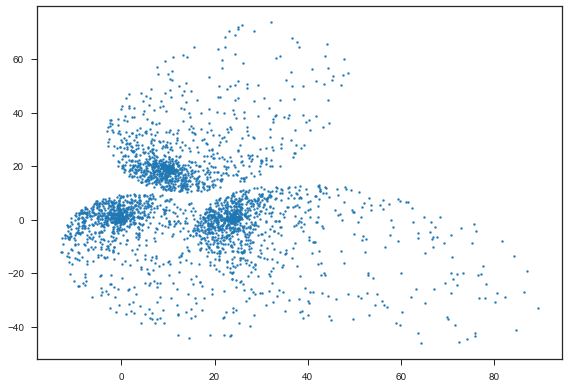

In [22]:
plt.scatter(X, Y, s=4)
plt.show()

In [51]:
avrfunc = averager_it(func.QuantileFunc(0.4, func.Sqrt(0.001)))
# avrfunc = averager_it(func.QuantileFunc(0.94, func.Power(1.01, 0.001)))
avrfunc = avragg.ParameterizedAverage(func.WinsorizedSmoothFunc(func.Sqrt(0.001)), avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=10)

In [52]:
hcd.fit(XY)

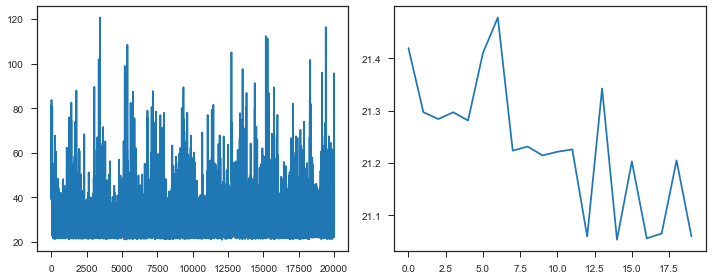

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.dvals)
plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

0.025185831677665572 8167.733262986991


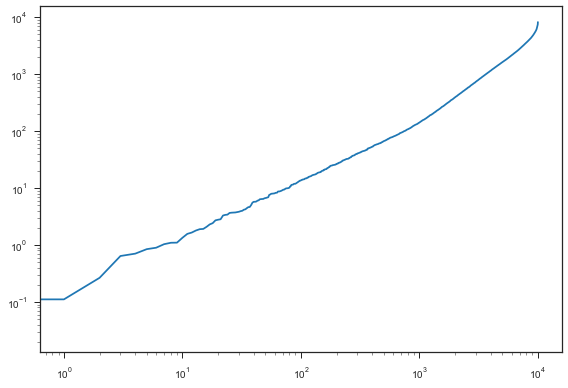

In [54]:
xrange1 = np.linspace(X.min(), X.max(), 100)
xrange2 = np.linspace(Y.min(), Y.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

D = hcd.evaluate_dist(XX)
# C = hcd.evaluate(XX)
# CC = np.asarray(C).reshape(XX1.shape)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

plt.loglog(sorted(D))

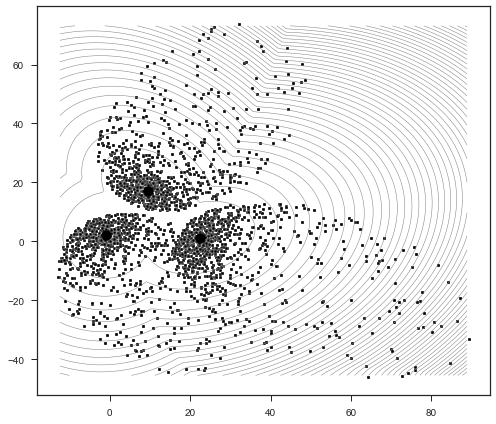

In [55]:
plt.figure(figsize=(7,6))
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.0,D.max(),50), colors='grey', linewidths=0.5)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)
plt.show()

In [28]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=10)

In [29]:
km.fit(XY)

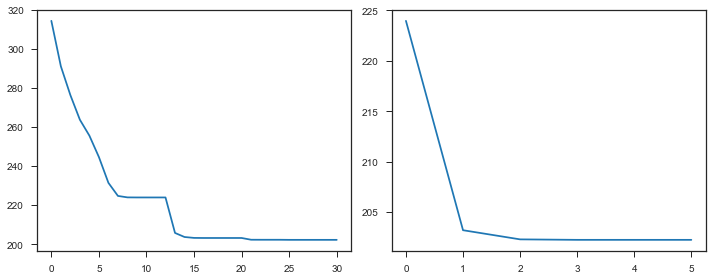

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

0.19415729383906777 7315.72889068559


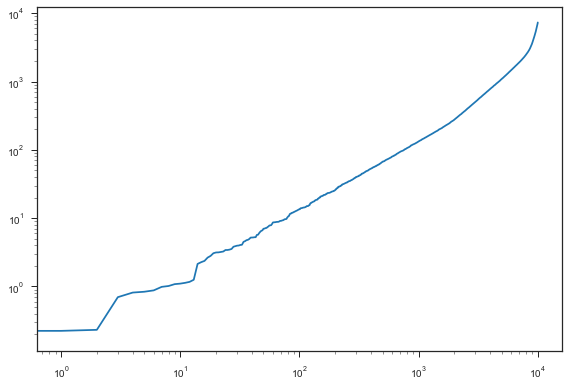

In [42]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())
plt.loglog(sorted(D2))

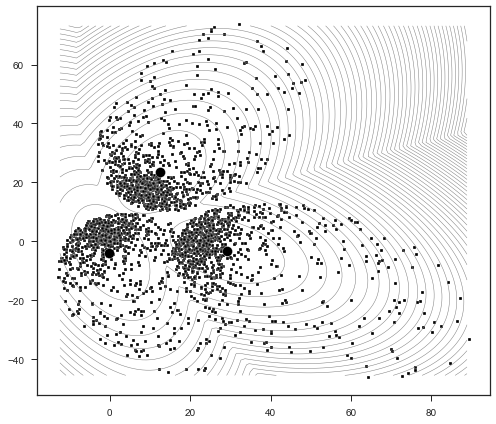

In [32]:
plt.figure(figsize=(7,6))
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.show()

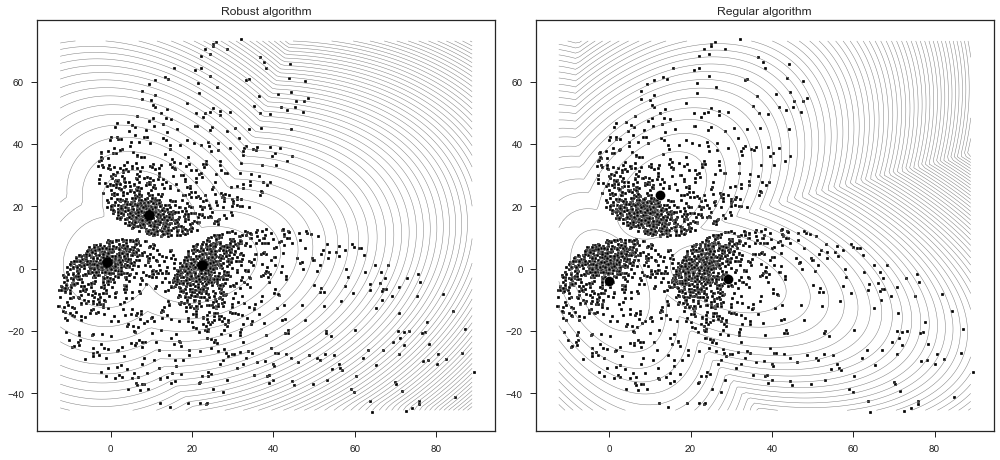

In [57]:
plt.figure(figsize=(14,6.5))

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D.max(),50), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.savefig('fig/robust_kmeans_center_variance_SZ1.eps')
plt.tight_layout()
plt.show()

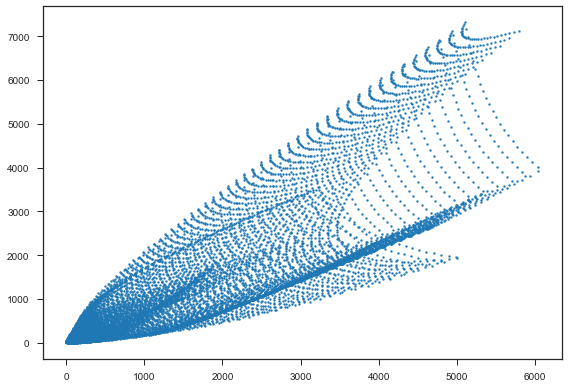

In [45]:
plt.scatter(D,D2,s=4)